# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from math import sqrt
from sklearn.metrics import mean_squared_error

#importing packages for the forecasting of time-series data

#import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

# deep neural frame work
import tensorflow

# Loading Data

In [3]:
temperature = pd.read_csv('C:\\Users\\dell\\Desktop\\berkeleyearth_data_Global_TEMPERATURE.csv', parse_dates=['dt'])

In [4]:
temperature.tail()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,OceanAverageTemperature
1987,2015-08-01,14.755,20.699,9.005,17.589
1988,2015-09-01,12.999,18.845,7.199,17.049
1989,2015-10-01,10.801,16.450,5.232,16.290
1990,2015-11-01,7.433,12.892,2.157,15.252
1991,2015-12-01,5.518,10.725,0.287,14.774


In [5]:
temperature.describe()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,OceanAverageTemperature
count,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,14.350601,2.743595,15.212566
std,4.263193,4.309579,4.155835,1.274093
min,0.404000,5.900000,-5.407000,12.475000
25%,4.430000,10.212000,-1.334500,14.047000
50%,8.850500,14.760000,2.949500,15.251000
75%,12.858500,18.451500,6.778750,16.396250
max,15.482000,21.320000,9.715000,17.611000


In [6]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 5 columns):
dt                         1992 non-null datetime64[ns]
LandAverageTemperature     1992 non-null float64
LandMaxTemperature         1992 non-null float64
LandMinTemperature         1992 non-null float64
OceanAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.9 KB


## Are we facing Global Warming ?  

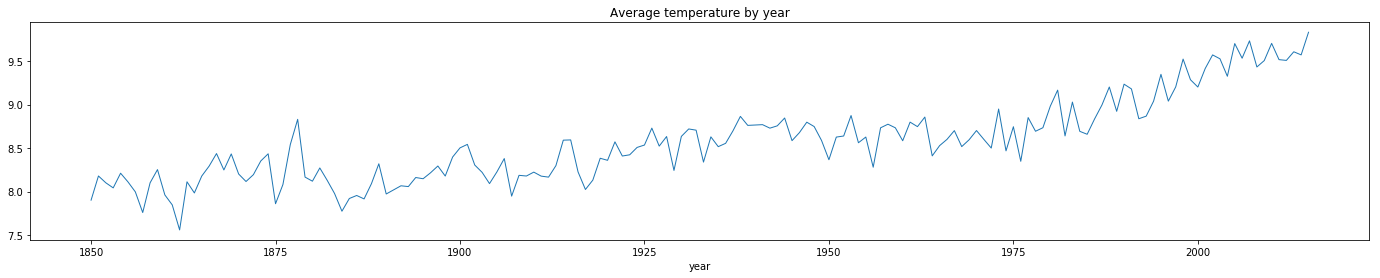

In [9]:
year_avg_temp = temperature.groupby(temperature.dt.dt.year).mean()
year_avg_temp.LandAverageTemperature.plot(linewidth = 1)
plt.title('Average temperature by year')
plt.xlabel('year')
plt.rcParams["figure.figsize"] = (24, 4)

***

# Creating Time Series

### Parameters under consideration

In [10]:
dt_df                      = pd.DataFrame(data = temperature.iloc[:, 0].values, columns = ['Date'])
LandAverageTemperature_df  = pd.DataFrame(data = temperature.iloc[:, 1].values, columns = ['LandAverageTemperature'])
OceanAverageTemperature_df = pd.DataFrame(data = temperature.iloc[:, 4].values, columns = ['OceanAverageTemperature'])

### Preparing Time Series For Land Average Temperature

#### New Data with dataframes : Date, Land_Average_Temperature

In [11]:
data_land_avg_temp = pd.concat([dt_df, LandAverageTemperature_df], axis =1)
data_land_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 2 columns):
Date                      1992 non-null datetime64[ns]
LandAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.2 KB


In [12]:
data_land_avg_temp.head()

,Date,LandAverageTemperature
0,1850-01-01,0.749
1,1850-02-01,3.071
2,1850-03-01,4.954
3,1850-04-01,7.217
4,1850-05-01,10.004


In [13]:
data_land_avg_temp.to_csv('C:\\Users\\dell\\Desktop\\data_land_avg_temp.csv')
data_land_avg_temp = pd.read_csv('C:\\Users\\dell\\Desktop\\data_land_avg_temp.csv', index_col='Date')

In [14]:
data_land_avg_temp = data_land_avg_temp.drop('Unnamed: 0', axis = 1)

In [15]:
data_land_avg_temp.head()

,LandAverageTemperature
Date,
1850-01-01,0.749
1850-02-01,3.071
1850-03-01,4.954
1850-04-01,7.217
1850-05-01,10.004


#### Time Series For LandAverageTemperature

In [16]:
data_land_avg_temp.index = pd.to_datetime(data_land_avg_temp.index)
print(data_land_avg_temp.head(3))
print("\n\n",data_land_avg_temp.tail(3))

            LandAverageTemperature
Date                              
1850-01-01                   0.749
1850-02-01                   3.071
1850-03-01                   4.954


             LandAverageTemperature
Date                              
2015-10-01                  10.801
2015-11-01                   7.433
2015-12-01                   5.518


#### Visualizing Time Series

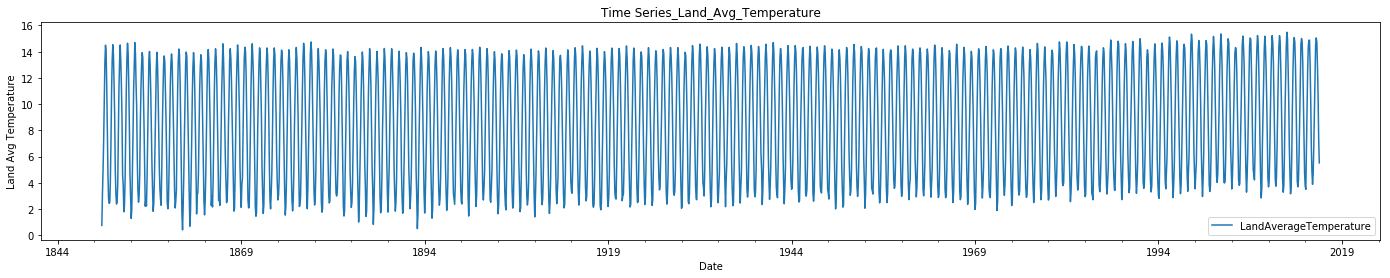

In [17]:
data_land_avg_temp.plot()
plt.title("Time Series_Land_Avg_Temperature")
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (20, 4)

### Magnifying view

In [18]:
a = data_land_avg_temp.head(72)

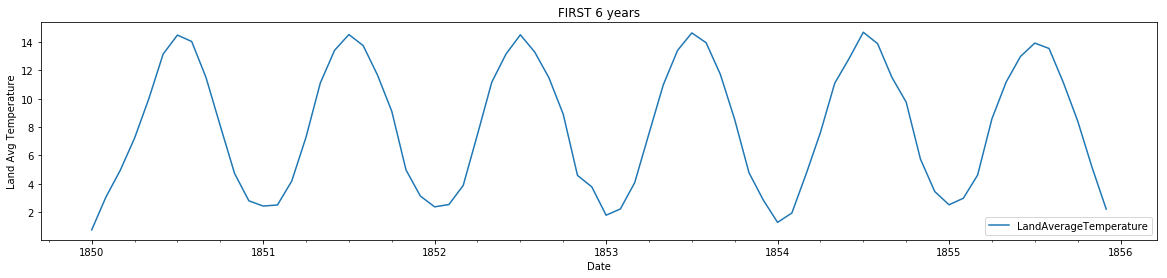

In [19]:
a.plot()
plt.title("FIRST 6 years")
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

In [20]:
b = data_land_avg_temp.tail(72)

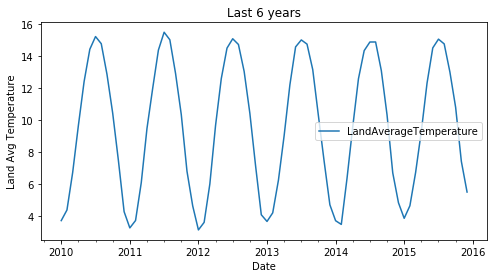

In [21]:
b.plot()
plt.title("Last 6 years")## Preparing Time Series For Land Average Temperature
plt.xlabel("Date")
plt.ylabel("Land Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

## Preparing Time Series For Ocean Average Temperature

## New Data with dataframes : Date, Ocean_Average_Temperature

In [22]:
data_ocean_avg_temp = pd.concat([dt_df, OceanAverageTemperature_df], axis =1)
data_ocean_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 2 columns):
Date                       1992 non-null datetime64[ns]
OceanAverageTemperature    1992 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.2 KB


In [23]:
data_ocean_avg_temp.head()

,Date,OceanAverageTemperature
0,1850-01-01,12.833
1,1850-02-01,13.588
2,1850-03-01,14.043
3,1850-04-01,14.667
4,1850-05-01,15.507


In [24]:
data_ocean_avg_temp.to_csv('C:\\Users\\dell\\Desktop\\data_ocean_avg_temp.csv')
data_ocean_avg_temp = pd.read_csv('C:\\Users\\dell\\Desktop\\data_ocean_avg_temp.csv', index_col='Date')

In [25]:
data_ocean_avg_temp = data_ocean_avg_temp.drop('Unnamed: 0', axis = 1)
data_ocean_avg_temp.head()

,OceanAverageTemperature
Date,
1850-01-01,12.833
1850-02-01,13.588
1850-03-01,14.043
1850-04-01,14.667
1850-05-01,15.507


#### Time Series For LandAverageTemperature

In [26]:
data_ocean_avg_temp.index = pd.to_datetime(data_ocean_avg_temp.index)
print(data_ocean_avg_temp.head(3))
print("\n\n",data_ocean_avg_temp.tail(3))

            OceanAverageTemperature
Date                               
1850-01-01                   12.833
1850-02-01                   13.588
1850-03-01                   14.043


             OceanAverageTemperature
Date                               
2015-10-01                   16.290
2015-11-01                   15.252
2015-12-01                   14.774


#### Visualizing Time Series

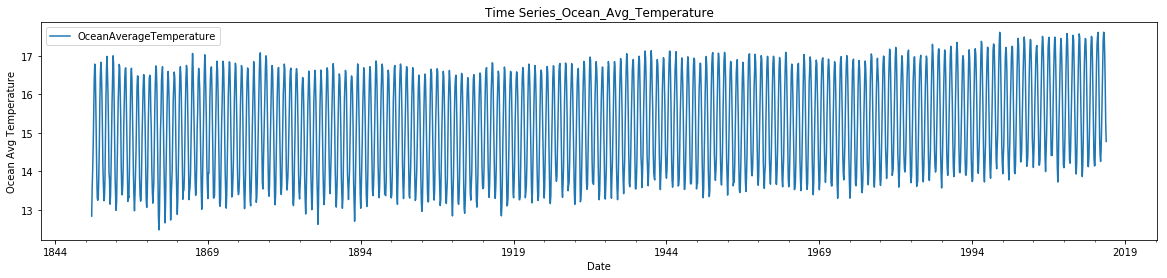

In [28]:
data_ocean_avg_temp.plot()
plt.title("Time Series_Ocean_Avg_Temperature")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (20, 4)

### Magnifying view

In [29]:
c = data_ocean_avg_temp.head(72)

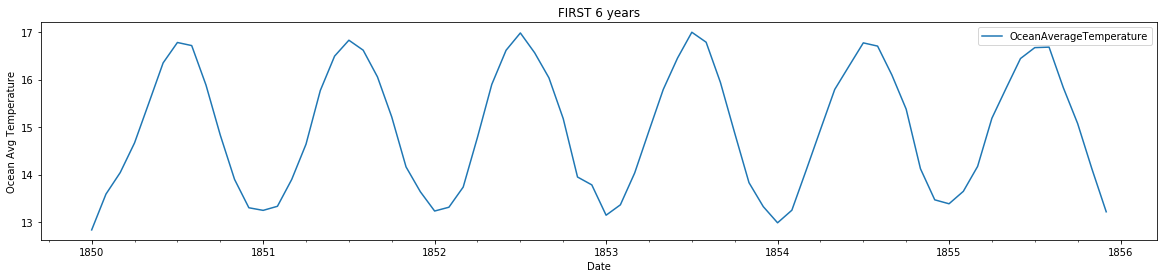

In [30]:
c.plot()
plt.title("FIRST 6 years")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

In [31]:
d = data_ocean_avg_temp.tail(72)

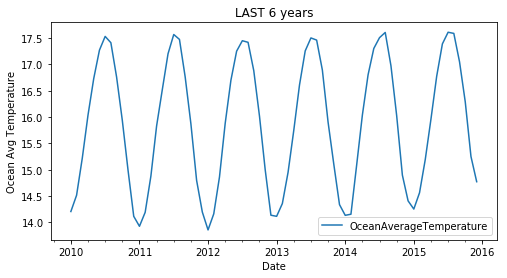

In [32]:
d.plot()
plt.title("LAST 6 years")
plt.xlabel("Date")
plt.ylabel("Ocean Avg Temperature")
plt.rcParams["figure.figsize"] = (8, 4)

***

***

In [33]:
# SPlit data
size = int(len(data_land_avg_temp)-98)
train, test = data_land_avg_temp[0:size], data_land_avg_temp[size:len(data_land_avg_temp)]

In [36]:

print("Total train  : ", len(train))
print("Total test   : ", len(test))

Total train  :  1894
Total test   :  98


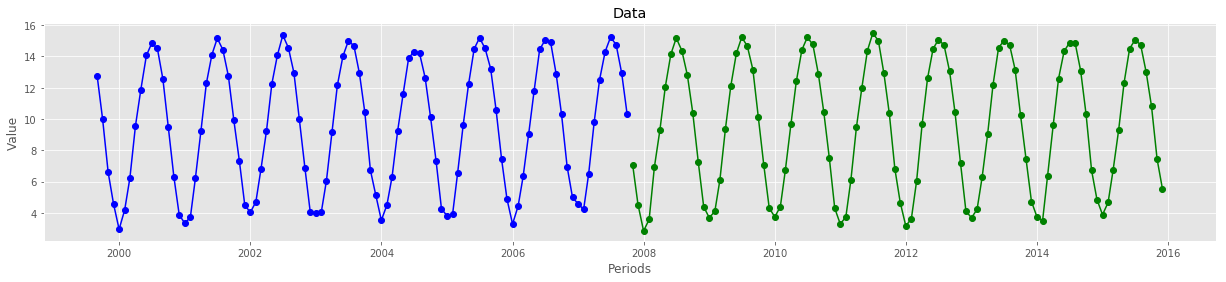

In [37]:
a = train[size-98:size]
#a = train.copy()
plt.style.use("ggplot")
plt.plot(a.index, a, c= 'blue', marker = "o", label = "training")
plt.plot(test.index, test, c= 'green', marker = "o", label = "testing")
plt.title("Data")
plt.xlabel("Periods")
plt.ylabel("Value")
plt.legend

plt.rcParams["figure.figsize"] = (21, 4)
plt.show()

# <font color = "blue">*HOLT LINEAR TREND MODEL*</font>

In [40]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['LandAverageTemperature'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))


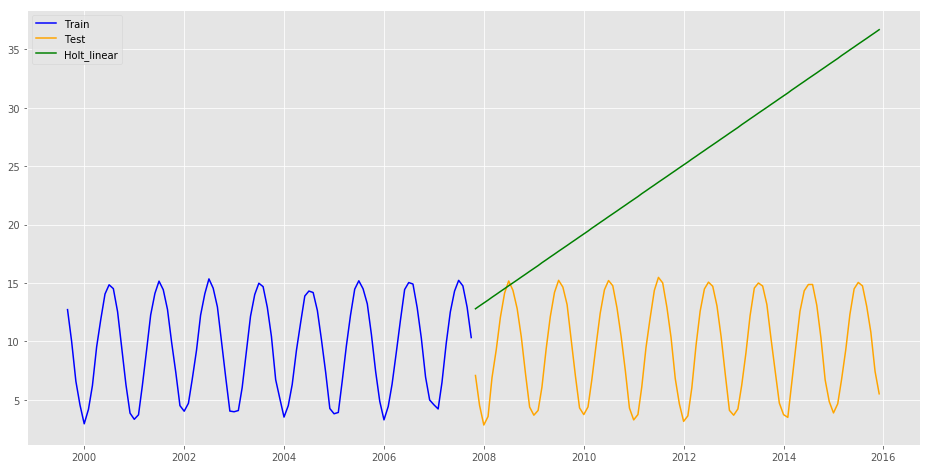

In [41]:
plt.figure(figsize=(16,8))
plt.plot(a, c ='blue', label='Train')
plt.plot(test, label='Test', c ='orange')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear', c ='green')
plt.legend(loc='best')
plt.show()

### RMSE RESULTS

In [42]:
mean_error_holt_linear = mean_squared_error(test.LandAverageTemperature, y_hat_avg.Holt_linear)
rmse = sqrt(mean_error_holt_linear)
print("RMSE value of Holt Linear Trend Model : %0.6f" %(rmse))

RMSE value of Holt Linear Trend Model : 17.127908


# <font color = "blue">*HOLT WINTERS MODEL*</font>

In [43]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['LandAverageTemperature']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))


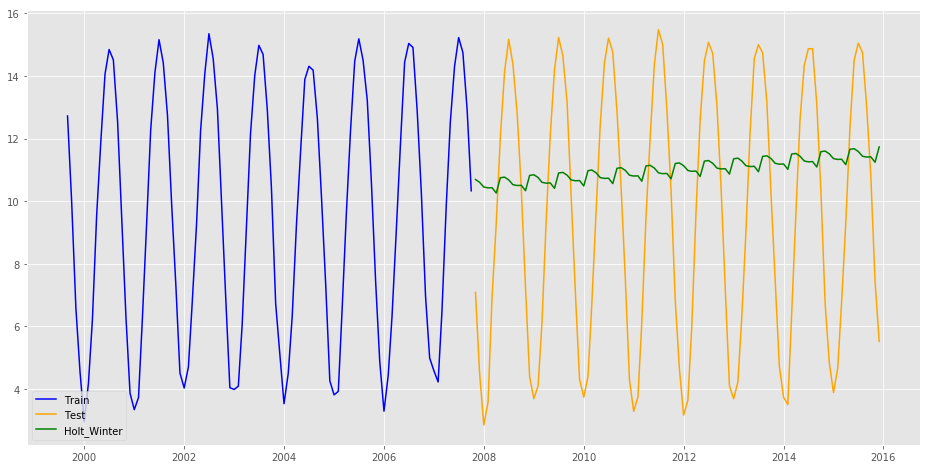

In [44]:
plt.figure(figsize=(16,8))
plt.plot( a, c='blue', label='Train')
plt.plot(test['LandAverageTemperature'], c = 'orange', label='Test')
plt.plot(y_hat_avg['Holt_Winter'], c = 'green', label='Holt_Winter')
plt.legend(loc='best')
plt.show()

#### Results

In [45]:
mean_error_holt_winter = mean_squared_error(test.LandAverageTemperature, y_hat_avg.Holt_Winter)
rmse_winter = sqrt(mean_error_holt_winter)
print("RMSE value of Holt Linear Trend Model : %0.6f" %(rmse_winter))

RMSE value of Holt Linear Trend Model : 4.427087


# <font color = 'green'>*Performing Rolling Mean Statistics*</font>

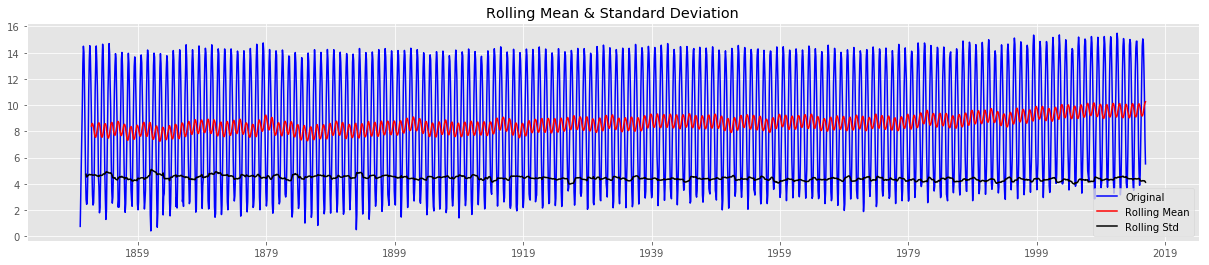

TESTING METHOD 1 : 
p-value        : 0.555483


TESTING METHOD 2 : 
ADF Stastistic : -1.455328
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is NON STATIONERY



In [46]:
def test_stationarity(x):

                                 # Determing rolling statistics
    mean = x.rolling(window=22).mean()
    std  = x.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x,       color = 'blue',  label = 'Original')
    mean = plot.plot(mean, color = 'red',   label = 'Rolling Mean')
    std  = plot.plot(std,  color = 'black', label = 'Rolling Std')
    
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    plt.rcParams["figure.figsize"] = (20, 4)
    
    
    
                                # Perform Dickey Fuller test    
    result = adfuller(x)
    print("TESTING METHOD 1 : ")
    print('p-value        : %f'%result[1])
    pvalue = result[1]
    
         
    print("\n\nTESTING METHOD 2 : ")
    print('ADF Stastistic : %f'%result[0])
    
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s     : %.3f ' % (key, value))
        
    for key,value in result[4].items():
         if result[0]>value:
            print("\nThe graph is NON STATIONERY\n")
            break
         else:
            print("\nThe graph is STATIONERY\n")
            break
       
        
ts = data_land_avg_temp['LandAverageTemperature']      
test_stationarity(ts)


## Making time series stationary

### <font color = 'green'>*Taking Log Transformation*</font>

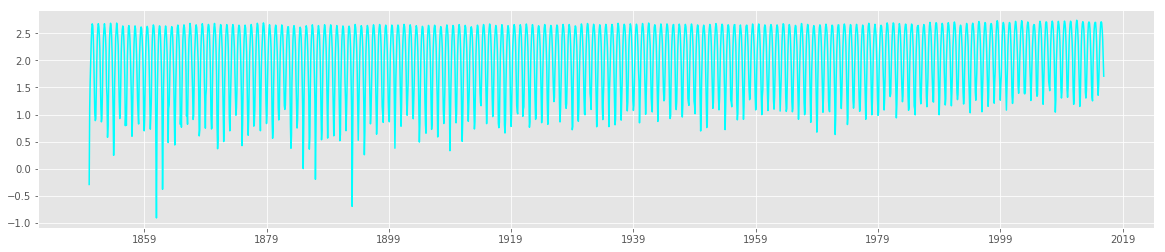

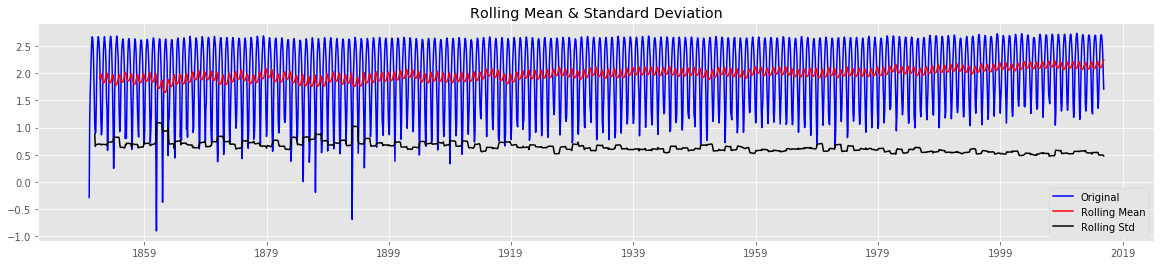

TESTING METHOD 1 : 
p-value        : 0.175885


TESTING METHOD 2 : 
ADF Stastistic : -2.287946
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is NON STATIONERY



In [47]:
ts_log = np.log(ts)
plot.plot(ts_log, color="cyan")
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

test_stationarity(ts_log)

### <font color = 'green'>*1) Average Removal*</font>

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


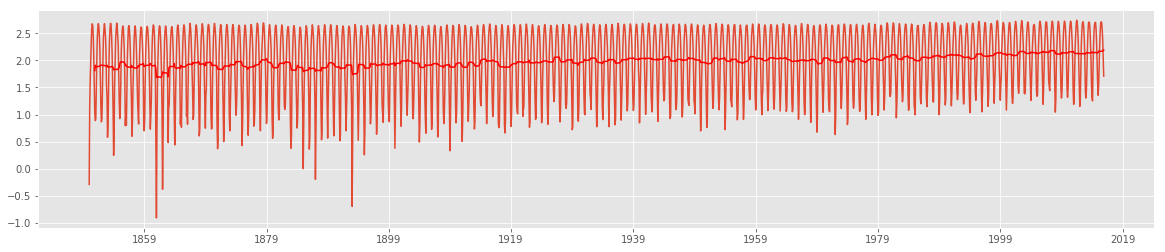

In [48]:
avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(avg, color='red')
plt.rcParams["figure.figsize"] = (20, 4)

In [49]:
avg_diff = ts_log - avg
#avg_diff.head(12)

In [50]:
avg_diff.dropna(inplace=True)

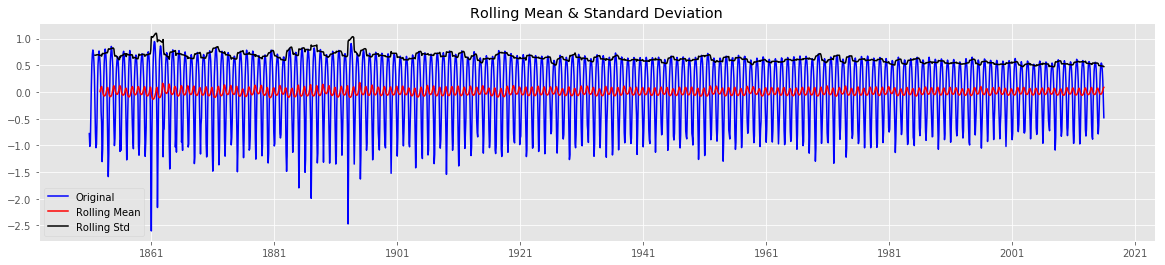

TESTING METHOD 1 : 
p-value        : 0.000000


TESTING METHOD 2 : 
ADF Stastistic : -11.710383
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is STATIONERY



In [51]:
test_stationarity(avg_diff)

### <font color = 'green'>*2) Exponentially Weighted Average* </font>

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,min_periods=0,ignore_na=False,halflife=12).mean()
  """Entry point for launching an IPython kernel.


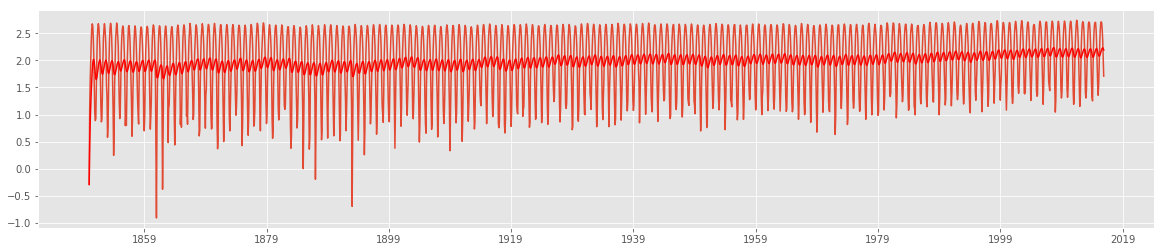

In [52]:
exp_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(exp_avg, color='red')
plt.rcParams["figure.figsize"] = (20, 4)

In [53]:
exp_diff = ts_log - exp_avg

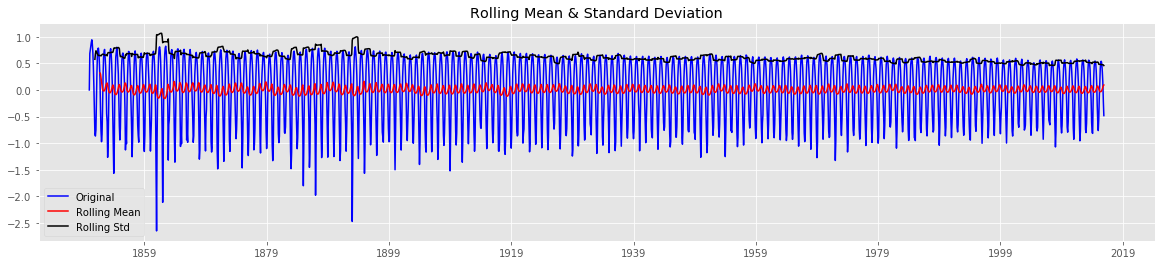

TESTING METHOD 1 : 
p-value        : 0.000000


TESTING METHOD 2 : 
ADF Stastistic : -9.314342
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is STATIONERY



In [54]:
test_stationarity(exp_diff)

## <font color = 'green'>*3) Decomposition*</font>

In [55]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

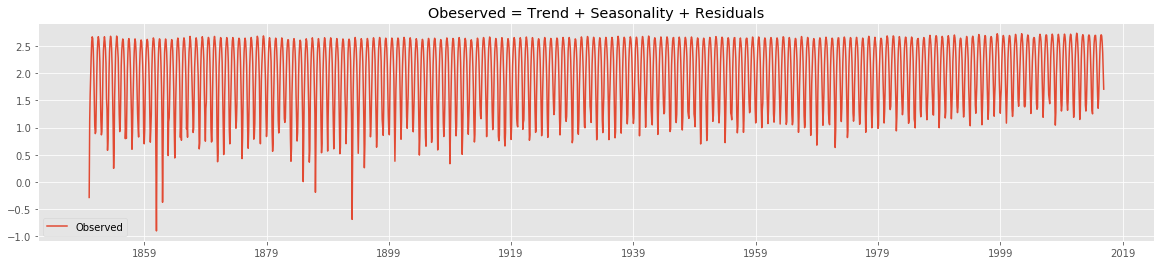

In [56]:
#    Obeserved

plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(ts_log,label='Observed')
plot.legend(loc='best')
plt.rcParams["figure.figsize"] = (20, 4)

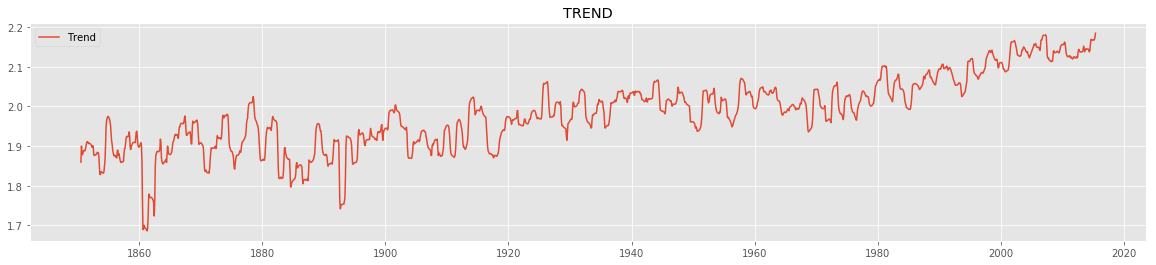

In [57]:
#    TREND    

plot.plot(trend, label='Trend')
plot.legend(loc='best')
plt.title("TREND")
plt.rcParams["figure.figsize"] = (20, 4)

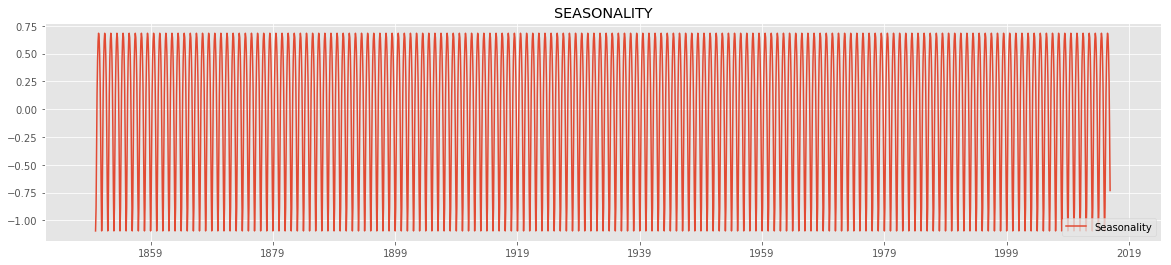

In [58]:
#    SEASONALITY
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.title("SEASONALITY")
plt.rcParams["figure.figsize"] = (20, 4)

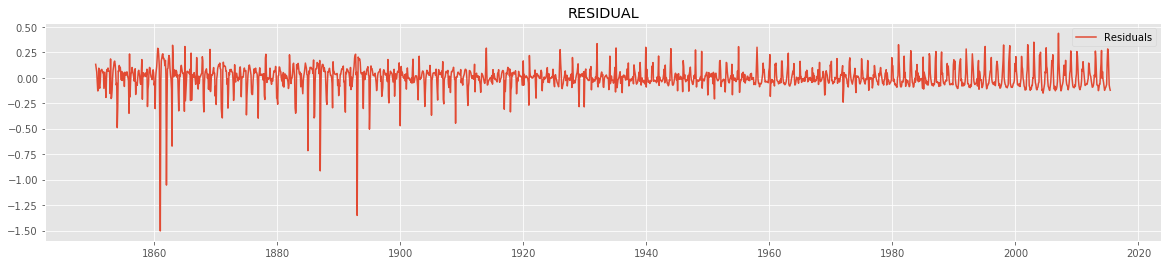

In [59]:
#    RESIDUAL

plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.title("RESIDUAL")
plt.rcParams["figure.figsize"] = (20, 4)

In [60]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)

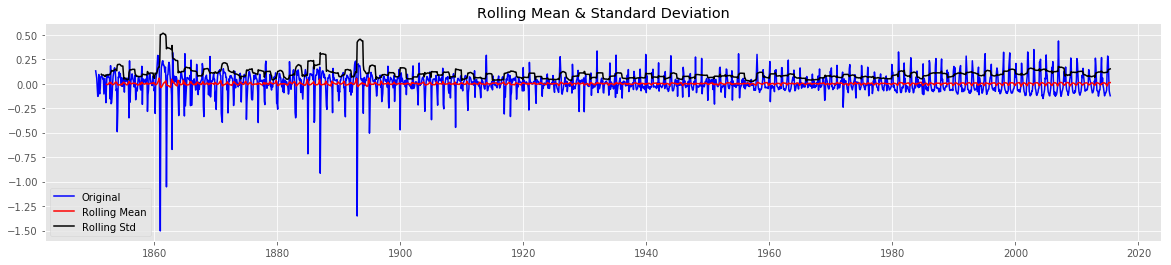

TESTING METHOD 1 : 
p-value        : 0.000000


TESTING METHOD 2 : 
ADF Stastistic : -17.780142
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is STATIONERY



In [61]:
test_stationarity(ts_decompose)

## <font color = 'green'>*4) Differencing*</font>

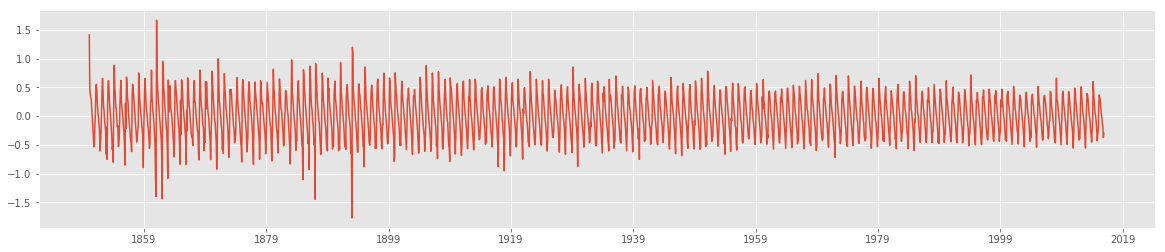

In [62]:
ts_diff = ts_log - ts_log.shift()
plt.plot(ts_diff)

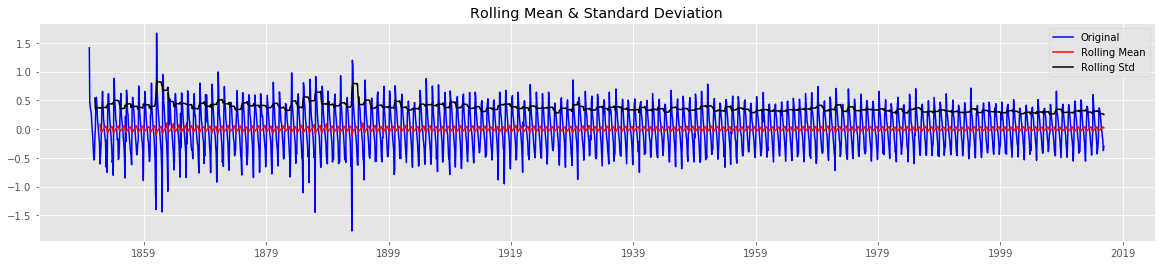

TESTING METHOD 1 : 
p-value        : 0.000000


TESTING METHOD 2 : 
ADF Stastistic : -14.680284
Critical values:
	5%     : -2.863 
	10%     : -2.568 
	1%     : -3.434 

The graph is STATIONERY



In [63]:
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)

***

***

# <font color = 'red'>*FORECAST 1)     MOVING AVERAGE*</font>

### q : ACF

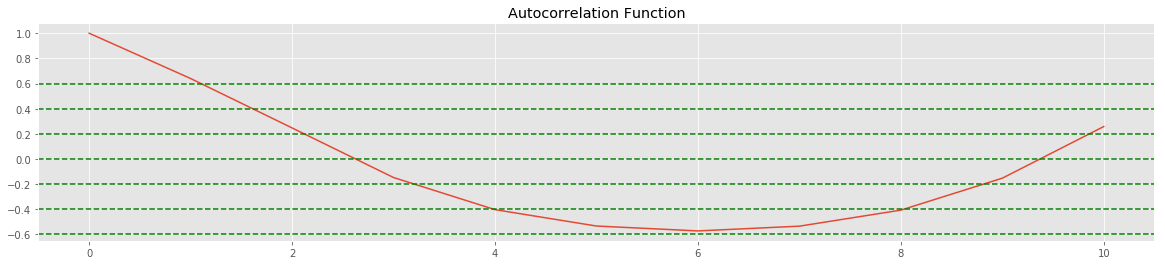

In [64]:
ts_acf = acf(ts_diff, nlags=10)
plot.plot(ts_acf)
plot.axhline(y = 0.6,linestyle='--',color='g')
plot.axhline(y = 0.4,linestyle='--',color='g')
plot.axhline(y = 0.2,linestyle='--',color='g')
plot.axhline(y = 0,  linestyle='--',color='g')
plot.axhline(y = -0.6,linestyle='--',color='g')
plot.axhline(y = -0.4,linestyle='--',color='g')
plot.axhline(y = -0.2,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

plt.rcParams["figure.figsize"] = (20, 4)

### Applying Model

In [65]:
# Splitting Train-Test Split
size = int(len(ts_diff)- 98)
train_ma, test_ma = ts_diff[0:size], ts_diff[size:len(ts_diff)]

In [66]:
g=4
# follow Error

history_ma = [y for y in train_ma]
forecast_ma = list()
originals_ma = list()
error_list_ma = list()

i=0

for t in range(len(test_ma)):
    model_ma = ARIMA(history_ma, order=(0, 1, 1))
    model_fit_ma = model_ma.fit(disp=-1)
    
    output_ma = model_fit_ma.forecast()
    
    forecast_value_ma = output_ma[0]
    
        
    original_value_ma = test_ma[t]
    history_ma.append(original_value_ma)
    
    forecast_value_ma = np.exp(forecast_value_ma)
    
    
    original_value_ma = np.exp(original_value_ma)

    error_ma = ((abs(forecast_value_ma - original_value_ma)) / original_value_ma) * 100
    error_list_ma.append(error_ma)
    
    i = i + 1
    print("Iteration NO. - ", i)
    print('Forecasted = %f  :  Expected = %f  :  Error = %f' % (forecast_value_ma, original_value_ma, error_ma), '%')           
        
            
    forecast_ma.append(float(abs(forecast_value_ma)))
    originals_ma.append(float(abs(original_value_ma)))


Mean_error_ma = (sum(error_list_ma)/float(len(error_list_ma)))
print('\n\nMeans Error in Forecasted Temperature : %f ' % (sum(error_list_ma)/float(len(error_list_ma))), '%')
print('RMSE in Forecasted Temperature  = %f' %sqrt(Mean_error_ma), "%")

Iteration NO. -  1
Forecasted = 0.795276  :  Expected = 0.685637  :  Error = 15.990916 %
Iteration NO. -  2
Forecasted = 0.680479  :  Expected = 0.638481  :  Error = 6.577787 %
Iteration NO. -  3
Forecasted = 0.636038  :  Expected = 0.628786  :  Error = 1.153256 %
Iteration NO. -  4
Forecasted = 0.627831  :  Expected = 1.257384  :  Error = 50.068498 %
Iteration NO. -  5
Forecasted = 1.295931  :  Expected = 1.931208  :  Error = 32.895295 %
Iteration NO. -  6
Forecasted = 1.965912  :  Expected = 1.345931  :  Error = 46.063348 %
Iteration NO. -  7
Forecasted = 1.322335  :  Expected = 1.296826  :  Error = 1.966984 %
Iteration NO. -  8
Forecasted = 1.294874  :  Expected = 1.173469  :  Error = 10.345742 %
Iteration NO. -  9
Forecasted = 1.167471  :  Expected = 1.072747  :  Error = 8.830041 %
Iteration NO. -  10
Forecasted = 1.067876  :  Expected = 0.947476  :  Error = 12.707404 %
Iteration NO. -  11
Forecasted = 0.941616  :  Expected = 0.890450  :  Error = 5.746101 %
Iteration NO. -  12
Fore

Iteration NO. -  94
Forecasted = 1.030508  :  Expected = 0.980334  :  Error = 5.118133 %
Iteration NO. -  95
Forecasted = 0.977098  :  Expected = 0.880989  :  Error = 10.909163 %
Iteration NO. -  96
Forecasted = 0.875620  :  Expected = 0.830910  :  Error = 5.380812 %
Iteration NO. -  97
Forecasted = 0.827991  :  Expected = 0.688177  :  Error = 20.316611 %
Iteration NO. -  98
Forecasted = 0.681037  :  Expected = 0.742365  :  Error = 8.261229 %


Means Error in Forecasted Temperature : 14.900387  %
RMSE in Forecasted Temperature  = 3.860102 %


### Visualising Results of MA

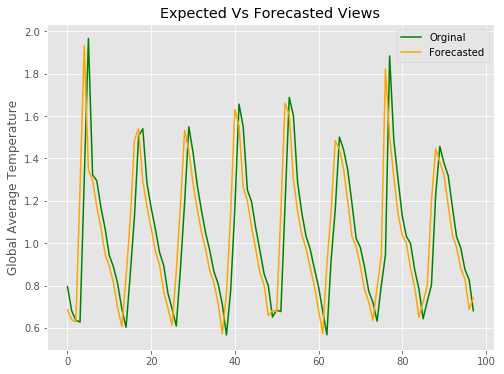

In [67]:
plot.figure(figsize=(8, 6))
test_day_ma = [t
           for t in range(len(test_ma))]
label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ma, forecast_ma, color= 'green', label = label1)
plot.plot(test_day_ma, originals_ma, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted Views')
plot.ylabel('Global Average Temperature')
plot.legend(loc = 'best')
plot.show()

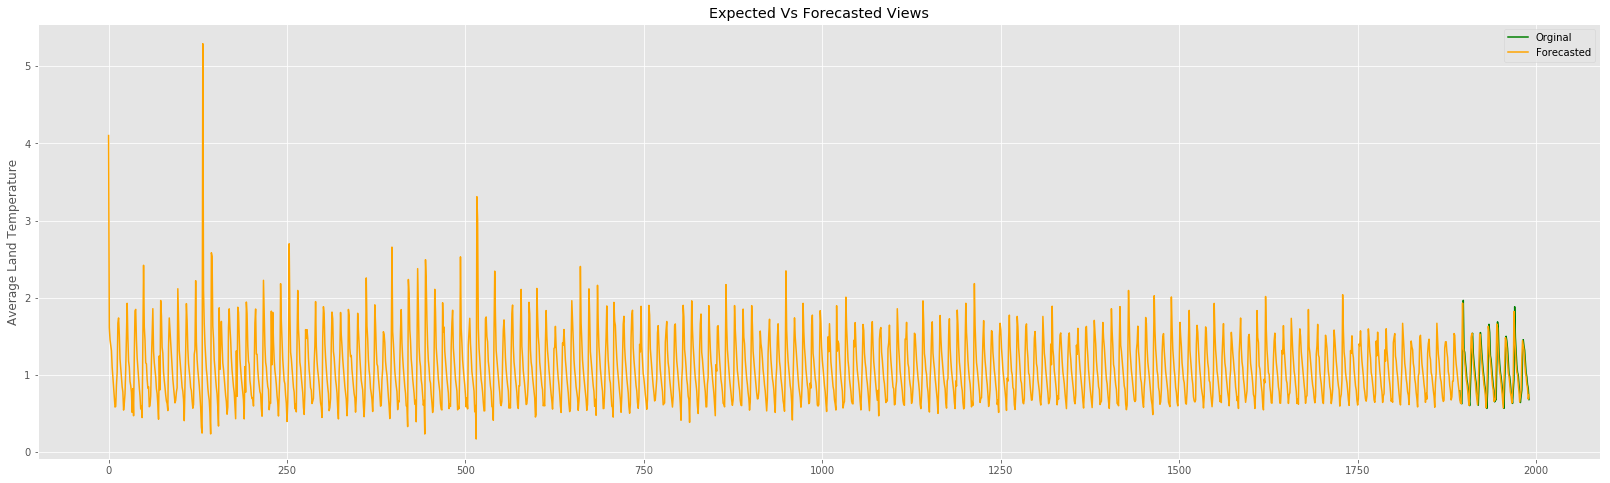

In [68]:

plot.figure(figsize=(28, 8))
   
test_day_ma = [t1 + (len(train_ma))
               for t1 in range(len(test_ma))]

b_ma = np.exp(ts_diff)
day_ma = [t2
          for t2 in range(len(ts_diff))]

label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ma, forecast_ma, color= 'green', label = label1)
plot.plot(day_ma, b_ma, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted Views')
plot.ylabel('Average Land Temperature')
plot.legend(loc = 'best')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

# <font color = 'red'>*FORECAST 2)     AUTO-REGRESSIVE(AR)*</font>

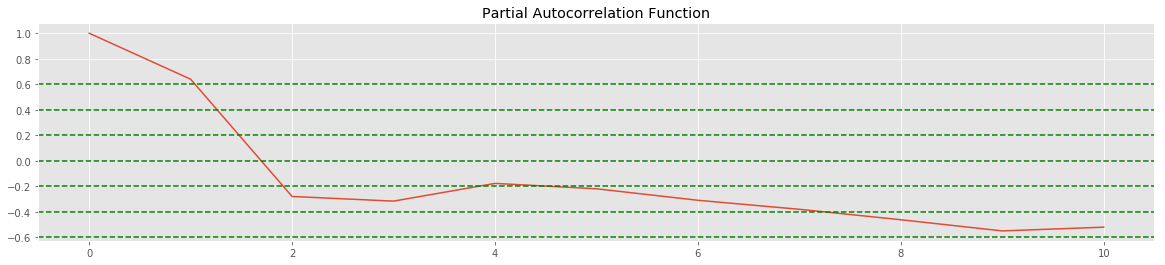

In [69]:
ts_pacf = pacf(ts_diff, nlags=10, method='ols')
plot.plot(ts_pacf)
plot.axhline(y = 0.6,linestyle='--',color='g')
plot.axhline(y = 0.4,linestyle='--',color='g')
plot.axhline(y = 0.2,linestyle='--',color='g')
plot.axhline(y = 0,  linestyle='--',color='g')
plot.axhline(y = -0.6,linestyle='--',color='g')
plot.axhline(y = -0.4,linestyle='--',color='g')
plot.axhline(y = -0.2,linestyle='--',color='g')
plot.title('Partial Autocorrelation Function')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

In [70]:
# Splitting Train-Test Split
size = int(len(ts_diff)- 98)
train_ar, test_ar = ts_diff[0:size], ts_diff[size:len(ts_diff)]

In [71]:
len(train_ar)

1893

In [72]:
# follow lag

history_ar = [x for x in train_ar]
forecast_ar = list()
originals_ar = list()
error_list_ar = list()

i = 0

for t in range(len(test_ar)):
    model_ar = ARIMA(history_ar, order=(1, 1, 0))
    model_fit_ar = model_ar.fit(disp=-1)
    
    output_ar = model_fit_ar.forecast()
    
    forecast_value_ar = output_ar[0]
    
        
    original_value_ar = test_ar[t]
    history_ar.append(original_value_ar)
    
    forecast_value_ar = np.exp(forecast_value_ar)
    
    
    original_value_ar = np.exp(original_value_ar)
    
    
    error_ar = ((abs(forecast_value_ar - original_value_ar)) / original_value_ar) * 100
    error_list_ar.append(error_ar)
    
          
    i = i + 1
    print("Iteration NO. - ", i)
    print('Forecasted = %f  :  Expected = %f  :  Error = %f' % (forecast_value_ar, original_value_ar, error_ar), '%')
            
    forecast_ar.append(float(forecast_value_ar))
    originals_ar.append(float(original_value_ar))
    
Mean_error_ar = (sum(error_list_ar)/float(len(error_list_ar)))
print('\n\nMeans Error in Forecasted Temperature : %f ' % (sum(error_list_ar)/float(len(error_list_ar))), '%')
print('RMSE in Forecasted Temperature  = %f' %sqrt(Mean_error_ar), "%")

Iteration NO. -  1
Forecasted = 0.795032  :  Expected = 0.685637  :  Error = 15.955257 %
Iteration NO. -  2
Forecasted = 0.680225  :  Expected = 0.638481  :  Error = 6.538060 %
Iteration NO. -  3
Forecasted = 0.635792  :  Expected = 0.628786  :  Error = 1.114136 %
Iteration NO. -  4
Forecasted = 0.627739  :  Expected = 1.257384  :  Error = 50.075803 %
Iteration NO. -  5
Forecasted = 1.297061  :  Expected = 1.931208  :  Error = 32.836829 %
Iteration NO. -  6
Forecasted = 1.969929  :  Expected = 1.345931  :  Error = 46.361776 %
Iteration NO. -  7
Forecasted = 1.322836  :  Expected = 1.296826  :  Error = 2.005647 %
Iteration NO. -  8
Forecasted = 1.293816  :  Expected = 1.173469  :  Error = 10.255629 %
Iteration NO. -  9
Forecasted = 1.167282  :  Expected = 1.072747  :  Error = 8.812464 %
Iteration NO. -  10
Forecasted = 1.067544  :  Expected = 0.947476  :  Error = 12.672390 %
Iteration NO. -  11
Forecasted = 0.941310  :  Expected = 0.890450  :  Error = 5.711685 %
Iteration NO. -  12
Fore

Iteration NO. -  93
Forecasted = 1.170235  :  Expected = 1.037642  :  Error = 12.778289 %
Iteration NO. -  94
Forecasted = 1.029988  :  Expected = 0.980334  :  Error = 5.065067 %
Iteration NO. -  95
Forecasted = 0.976696  :  Expected = 0.880989  :  Error = 10.863515 %
Iteration NO. -  96
Forecasted = 0.875350  :  Expected = 0.830910  :  Error = 5.348290 %
Iteration NO. -  97
Forecasted = 0.827684  :  Expected = 0.688177  :  Error = 20.272016 %
Iteration NO. -  98
Forecasted = 0.680728  :  Expected = 0.742365  :  Error = 8.302777 %


Means Error in Forecasted Temperature : 14.889718  %
RMSE in Forecasted Temperature  = 3.858720 %


### Visualising Results of AR

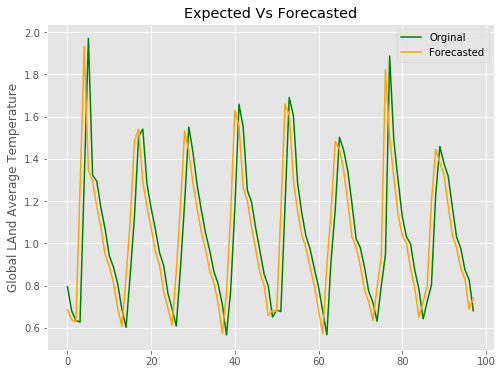

In [73]:
plot.figure(figsize=(8, 6))
test_day_ar = [t
           for t in range(len(test_ar))]
label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ar, forecast_ar, color= 'green', label = label1)
plot.plot(test_day_ar, originals_ar, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted')
plot.ylabel('Global LAnd Average Temperature')
plot.legend(loc = 'best')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

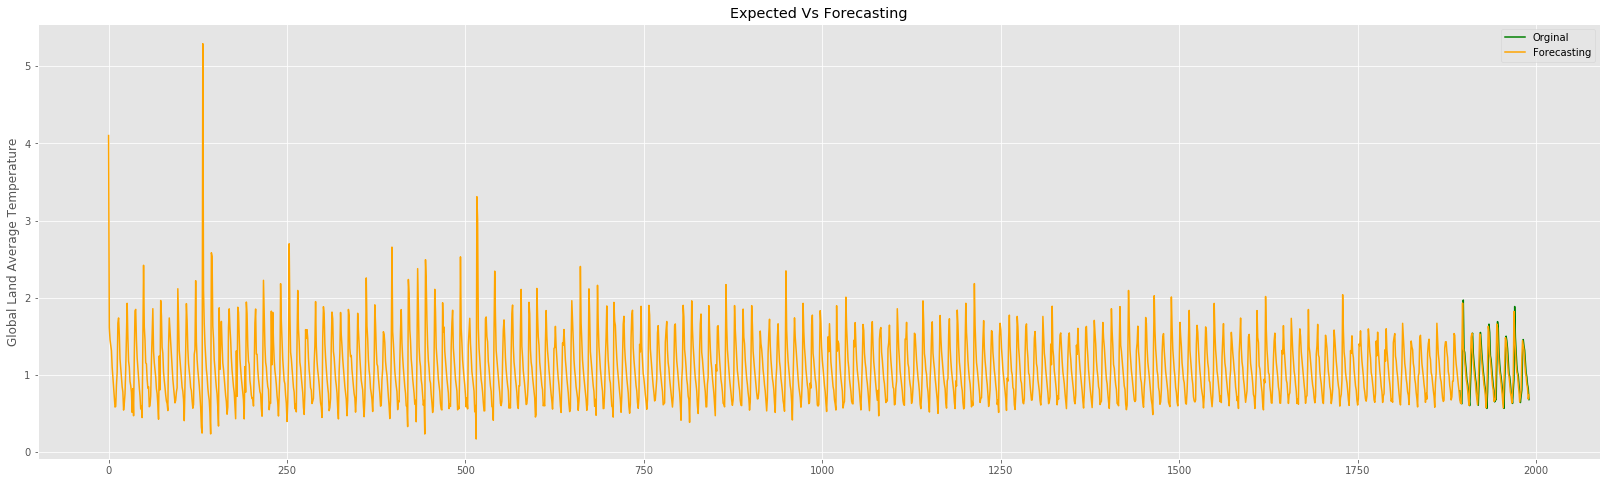

In [74]:

plot.figure(figsize=(28, 8))
   
test_day_ar = [t1 + (len(train_ar))
               for t1 in range(len(test_ar))]

b = np.exp(ts_diff)
day_ar = [t2
          for t2 in range(len(ts_diff))]

label1 = 'Orginal'
label2 = 'Forecasting'
plot.plot(test_day_ar, forecast_ar, color= 'green', label = label1)
plot.plot(day_ar, b, color = 'orange', label = label2)
plot.title('Expected Vs Forecasting')
plot.ylabel('Global Land Average Temperature')
plot.legend(loc = 'best')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

# <font color = 'red'>*FORECAST 3) ARIMA(AutoRegressive Integrated Moving Average)*</font>

In [75]:
# Splitting Train-Test Split
size = int(len(ts_diff)- 97)
train_arima, test_arima = ts_diff[0:size], ts_diff[size:len(ts_diff)]

In [76]:
# follow lag

# Splitting Train-Test Split
size = int(len(ts_log)- 98)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]

history_arima = [x for x in train_arima]
forecast_arima = list()
originals_arima = list()
error_list_arima = list()

i = 0

for t in range(len(test_arima)):
    model_arima = ARIMA(history_arima, order=(1, 0, 1))
    model_fit_arima = model_arima.fit(disp=-1)
    output_arima = model_fit_arima.forecast()
    
    forecast_value_arima = output_arima[0]
    
        
    original_value_arima = test_arima[t]
    history_arima.append(original_value_arima)
    
    forecast_value_arima = np.exp(forecast_value_arima)    
    original_value_arima = np.exp(original_value_arima)    
    error_arima = (((abs(forecast_value_arima - original_value_arima))/g) / original_value_arima) * 100
    error_list_arima.append(error_arima)   
          
    i = i + 1
    print("Iteration NO. - ", i)
    print('Forecasted = %f : Expected = %f : Error = %f' % (forecast_value_arima, original_value_arima, abs(error_arima)), '%')
            
    forecast_arima.append(float(forecast_value_arima))
    originals_arima.append(float(original_value_arima))
    
Mean_error_arima = (sum(error_list_arima)/float(len(error_list_arima)))
print('\n\nMeans Error in Forecasted Temperature : %f ' % (sum(error_list_arima)/float(len(error_list_arima))), '%')
print('RMSE in Forecasted Temperature  = %f' %sqrt(Mean_error_arima), "%")

Iteration NO. -  1
Forecasted = 8.989412 : Expected = 7.084000 : Error = 6.724350 %
Iteration NO. -  2
Forecasted = 6.176126 : Expected = 4.523000 : Error = 9.137334 %
Iteration NO. -  3
Forecasted = 4.218238 : Expected = 2.844000 : Error = 12.080147 %
Iteration NO. -  4
Forecasted = 2.831279 : Expected = 3.576000 : Error = 5.206381 %
Iteration NO. -  5
Forecasted = 4.865507 : Expected = 6.906000 : Error = 7.386667 %
Iteration NO. -  6
Forecasted = 8.558189 : Expected = 9.295000 : Error = 1.981739 %
Iteration NO. -  7
Forecasted = 9.147603 : Expected = 12.054000 : Error = 6.027869 %
Iteration NO. -  8
Forecasted = 12.466564 : Expected = 14.145000 : Error = 2.966484 %
Iteration NO. -  9
Forecasted = 12.881055 : Expected = 15.174000 : Error = 3.777752 %
Iteration NO. -  10
Forecasted = 13.887150 : Expected = 14.377000 : Error = 0.851794 %
Iteration NO. -  11
Forecasted = 12.360794 : Expected = 12.802000 : Error = 0.861596 %
Iteration NO. -  12
Forecasted = 11.329594 : Expected = 10.39900

Iteration NO. -  97
Forecasted = 9.578170 : Expected = 7.433000 : Error = 7.215021 %
Iteration NO. -  98
Forecasted = 6.354373 : Expected = 5.518000 : Error = 3.789294 %


Means Error in Forecasted Temperature : 4.222607  %
RMSE in Forecasted Temperature  = 2.054898 %


#### Visualising ARIMA

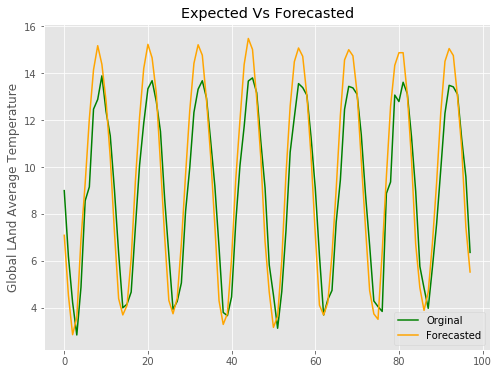

In [77]:
plot.figure(figsize=(8, 6))
test_day_ar = [t
           for t in range(len(test_ar))]
label1 = 'Orginal'
label2 = 'Forecasted'
plot.plot(test_day_ar, forecast_arima, color= 'green', label = label1)
plot.plot(test_day_ar, originals_arima, color = 'orange', label = label2)
plot.title('Expected Vs Forecasted')
plot.ylabel('Global LAnd Average Temperature')
plot.legend(loc = 'best')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

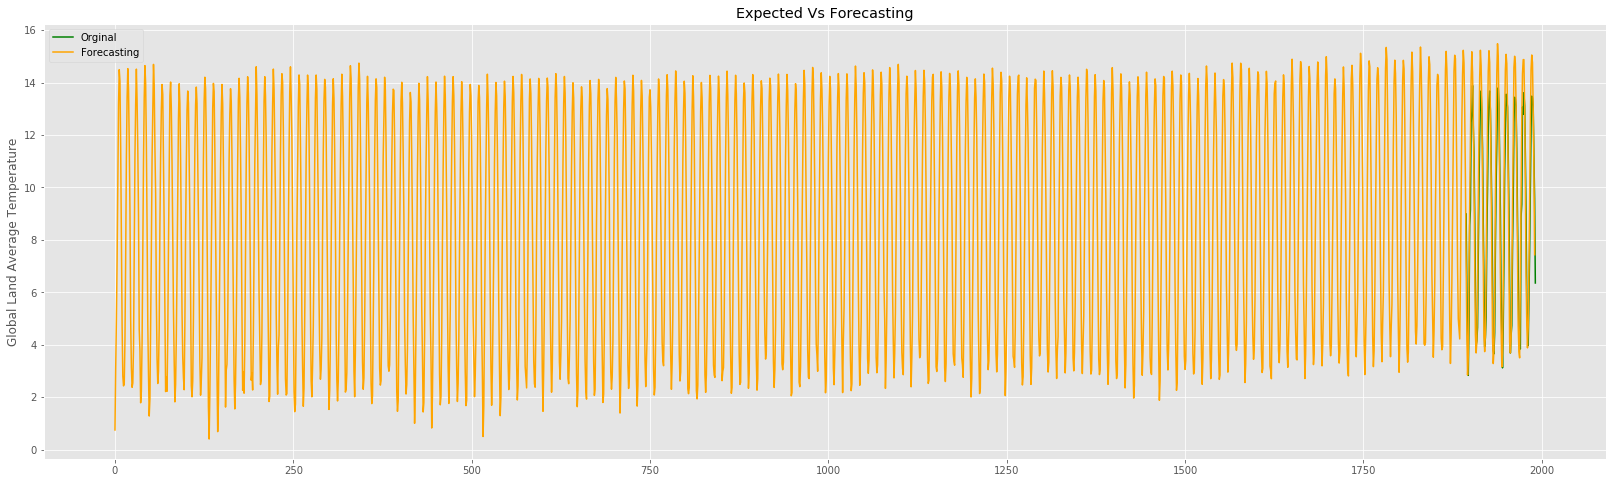

In [78]:
plot.figure(figsize=(28, 8))
   
test_day_arima = [t1 + (len(train_arima))
               for t1 in range(len(test_arima))]

b = np.exp(ts_log[0:1991])
day_arima = [t2
          for t2 in range(len(ts_log+1))]

label1 = 'Orginal'
label2 = 'Forecasting'
plot.plot(test_day_arima, forecast_arima, color= 'green', label = label1)
plot.plot(day_ar, b, color = 'orange', label = label2)
plot.title('Expected Vs Forecasting')
plot.ylabel('Global Land Average Temperature')
plot.legend(loc = 'best')
plot.show()
plt.rcParams["figure.figsize"] = (20, 4)

# <font color = 'red'>*LONG SHORT TERM MEMORY - LSTM *</font>

In [79]:
train_set = ts_diff[0:1192-48].reshape(-1,1)
test_set = ts_diff.tail(48).reshape(-1,1)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [80]:
train_scaled = train_set
test_scaled = test_set

In [81]:
def next_batch(training_data,batch_size,steps):
    
    rand_start = np.random.randint(0,len(training_data)-steps) 

    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [82]:
import tensorflow as tf

In [83]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
learning_rate = 0.03 
num_train_iterations = 5000
batch_size = 1

In [84]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [85]:
# Also play around with GRUCell
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)  

In [86]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [87]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [88]:
init = tf.global_variables_initializer()

In [89]:
saver = tf.train.Saver()

In [90]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [91]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # MODEL SAVED FOR FORECASTING LATER
    saver.save(sess, "C:\\Users\\dell\\Desktop\\./ex_time_series_model")

0 	MSE: 0.122252
100 	MSE: 0.036723
200 	MSE: 0.0899871
300 	MSE: 0.0153872
400 	MSE: 0.0218527
500 	MSE: 0.00796556
600 	MSE: 0.0212764
700 	MSE: 0.0578389
800 	MSE: 0.0234419
900 	MSE: 0.0204155
1000 	MSE: 0.0602057
1100 	MSE: 0.0738922
1200 	MSE: 0.0782312
1300 	MSE: 0.0227656
1400 	MSE: 0.0304818
1500 	MSE: 0.0127676
1600 	MSE: 0.00731742
1700 	MSE: 0.00592796
1800 	MSE: 0.044975
1900 	MSE: 0.0419213
2000 	MSE: 0.0351495
2100 	MSE: 0.017796
2200 	MSE: 0.00837436
2300 	MSE: 0.0132746
2400 	MSE: 0.126727
2500 	MSE: 0.0147192
2600 	MSE: 0.00455398
2700 	MSE: 0.0370377
2800 	MSE: 0.00613945
2900 	MSE: 0.0104364
3000 	MSE: 0.0931702
3100 	MSE: 0.0121131
3200 	MSE: 0.0103683
3300 	MSE: 0.0224657
3400 	MSE: 0.0357461
3500 	MSE: 0.0163652
3600 	MSE: 0.00396911
3700 	MSE: 0.00875347
3800 	MSE: 0.0139172
3900 	MSE: 0.0404083
4000 	MSE: 0.00775913
4100 	MSE: 0.013771
4200 	MSE: 0.00743757
4300 	MSE: 0.0164237
4400 	MSE: 0.0152126
4500 	MSE: 0.00467627
4600 	MSE: 0.0578059
4700 	MSE: 0.0185264

In [92]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "C:\\Users\\dell\\Desktop\\./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-24:])
    
    ## Now create a for loop that 
    for iteration in range(48):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from C:\Users\dell\Desktop\./ex_time_series_model


In [93]:
#train_seed

In [94]:
results = np.array(train_seed[-36:]).reshape(36,1)

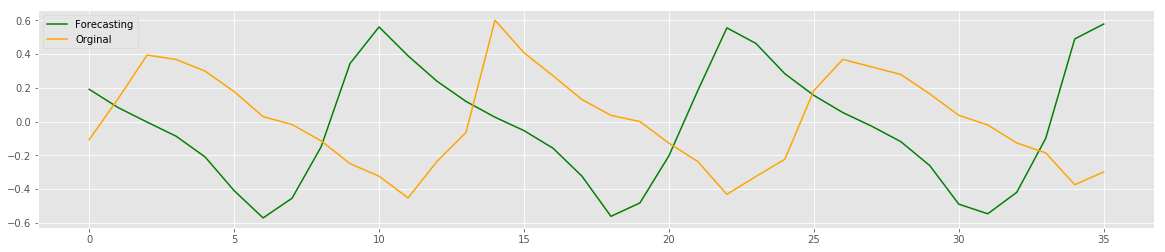

In [95]:
label1 = 'Orginal'
label2 = 'Forecasting'
plot.plot(results[-36:], color= 'green', label = label2)
plot.plot(test_set[-36:], color= 'orange', label = label1)
plot.legend(loc = 'best')
plot.show()

In [96]:
i=0
error_list_lstm = list()
error_lstm = ((abs(forecast_value_ar - original_value_ar)) / original_value_ar) * 100
error_list_lstm.append(error_ar)
    
for i in range (0, 36):
    
    error_lstm = ((abs(abs(test_set[i]) - abs(results[i]))) / results[i])    
    error_list_lstm.append(abs(error_lstm))
    print('Forecasted = %f : Expected = %f : Error = %0.3f' % (test_set[i], results[i], abs(error_lstm)))    

Forecasted = -0.388320 : Expected = 0.191419 : Error = 1.029
Forecasted = 0.139059 : Expected = 0.082862 : Error = 0.678
Forecasted = 0.506904 : Expected = -0.003082 : Error = 163.485
Forecasted = 0.474063 : Expected = -0.086689 : Error = 4.469
Forecasted = 0.263254 : Expected = -0.209462 : Error = 0.257
Forecasted = 0.140694 : Expected = -0.408767 : Error = 0.656
Forecasted = 0.039507 : Expected = -0.570348 : Error = 0.931
Forecasted = -0.023897 : Expected = -0.453596 : Error = 0.947
Forecasted = -0.121186 : Expected = -0.149937 : Error = 0.192
Forecasted = -0.223527 : Expected = 0.344248 : Error = 0.351
Forecasted = -0.376543 : Expected = 0.560467 : Error = 0.328
Forecasted = -0.556477 : Expected = 0.389457 : Error = 0.429
Forecasted = -0.107204 : Expected = 0.238896 : Error = 0.551
Forecasted = 0.136038 : Expected = 0.119403 : Error = 0.139
Forecasted = 0.394031 : Expected = 0.025947 : Error = 14.186
Forecasted = 0.367762 : Expected = -0.053448 : Error = 5.881
Forecasted = 0.298924 

In [97]:
Mean_error_lstm = (sum(error_list_lstm)/float(len(error_list_lstm)))
print('\n\nMean Error in Forecasted Temperature : %f ' % (Mean_error_lstm), '%')
print('RMSE in Forecasted Temperature  = %f' %sqrt(Mean_error_lstm), "%")



Mean Error in Forecasted Temperature : 6.443471  %
RMSE in Forecasted Temperature  = 2.538399 %
